In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
np.sum(df.isna()) # director 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df['director'] = df['director'].fillna('NotAvailable')
df['cast'] = df['cast'].fillna('NotAvailable')
df['country'].fillna(df.country.mode()[0], inplace=True)
df['date_added'].fillna(df.date_added.mode()[0], inplace=True)
df['rating'].fillna(df.rating.mode()[0], inplace= True)
df['duration'].fillna(df.duration.mode()[0], inplace=True)

In [7]:
np.sum(df.isna()) # All the null values have been eliminated

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Lets do some EDA

In [8]:
# Printing unique values in each column of the dataframe
df.nunique(axis = 0)

show_id         8807
type               2
title           8807
director        4529
cast            7693
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [9]:
# The number of unque values in some of the above fields feels weird
np.unique(df.country)
# Some movies belong to a combination of countries 
# -> Like this
# 'Denmark, Indonesia, Finland, Norway, United Kingdom, Israel, France, United States, Germany, Netherlands' 

array([', France, Algeria', ', South Korea', 'Argentina',
       'Argentina, Brazil, France, Poland, Germany, Denmark',
       'Argentina, Chile', 'Argentina, Chile, Peru', 'Argentina, France',
       'Argentina, France, United States, Germany, Qatar',
       'Argentina, Italy', 'Argentina, Spain', 'Argentina, United States',
       'Argentina, United States, Mexico', 'Argentina, Uruguay, Serbia',
       'Argentina, Uruguay, Spain, France', 'Argentina, Venezuela',
       'Australia',
       'Australia, Armenia, Japan, Jordan, Mexico, Mongolia, New Zealand, Philippines, South Africa, Sweden, United States, Uruguay',
       'Australia, Canada', 'Australia, France',
       'Australia, France, Ireland', 'Australia, Germany',
       'Australia, India', 'Australia, Iraq', 'Australia, New Zealand',
       'Australia, New Zealand, United States',
       'Australia, United Arab Emirates', 'Australia, United Kingdom',
       'Australia, United Kingdom, Canada',
       'Australia, United Kingdom,

In [10]:
np.unique(df.release_year)

array([1925, 1942, 1943, 1944, 1945, 1946, 1947, 1954, 1955, 1956, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [11]:
np.unique(df.rating, return_counts=True)

(array(['66 min', '74 min', '84 min', 'G', 'NC-17', 'NR', 'PG', 'PG-13',
        'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7',
        'TV-Y7-FV', 'UR'], dtype=object),
 array([   1,    1,    1,   41,    3,   80,  287,  490,  799, 2160,  220,
        3211,  863,  307,  334,    6,    3]))

In [12]:
df.type.tail()

8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, dtype: object

In [13]:
df.description[0]

'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

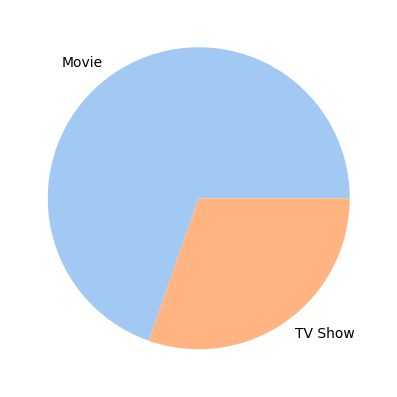

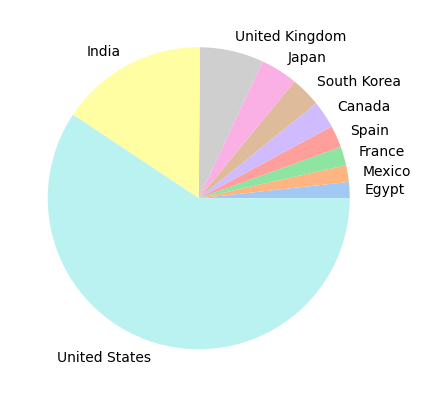

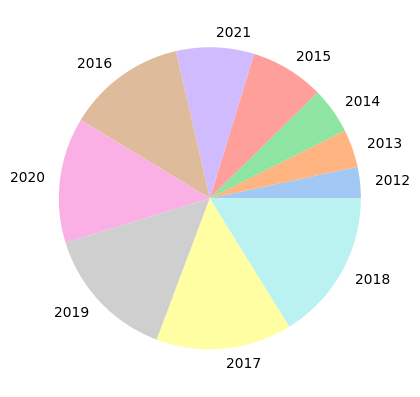

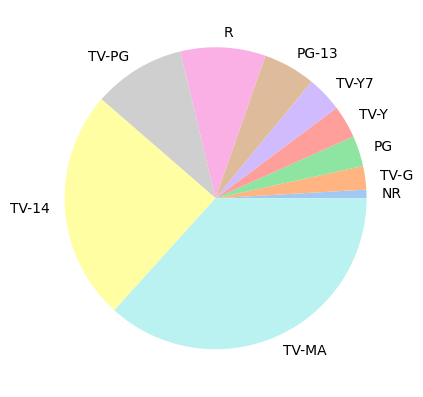

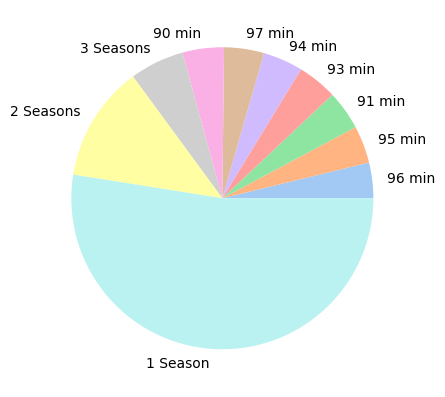

In [47]:
# Lets compare the number of tv shows to the number of movies
for col in ['type', 'country', 'release_year', 'rating', 'duration']:
    labels,data = np.unique(df[col], return_counts=True)
    sort = np.argsort(data)
    if len(data) > 10:
        data = data[sort][-10:]
        labels = labels[sort][-10:]
    colors = sns.color_palette('pastel')[:len(data)]
    plt.figure(figsize=(5,5), dpi=100)
    plt.pie(data,labels=labels, colors=colors)
    plt.show() 

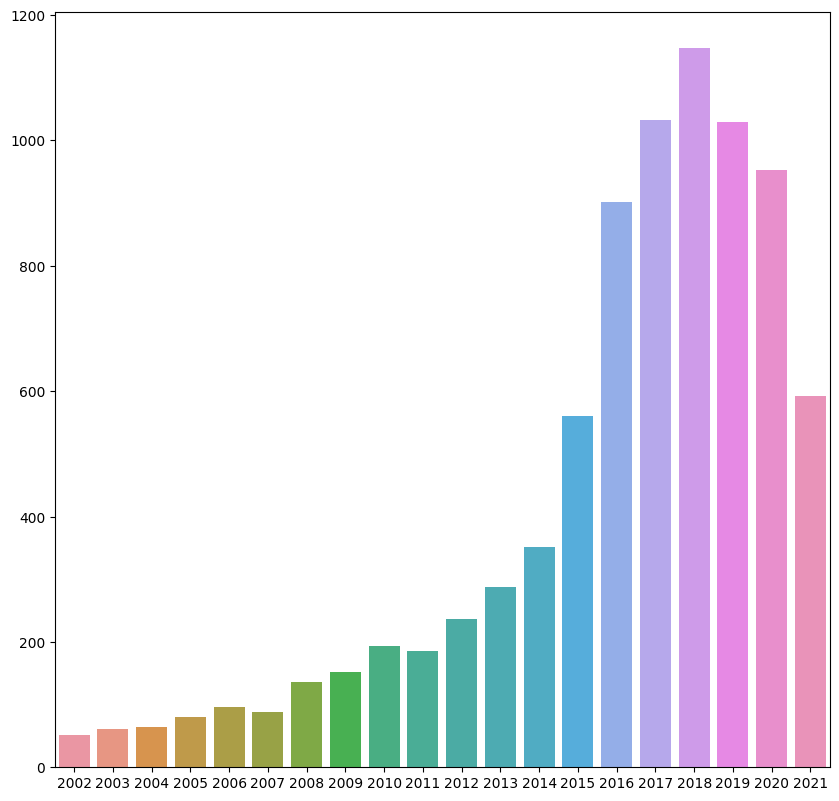

In [18]:
label, freq = np.unique(df.release_year, return_counts=True)
label = label[-20:]
freq = freq[-20:]
plt.figure(figsize=(10,10), dpi=100)
sns.barplot(x = label, y=freq)
plt.show()
# 2018 had the largest number of released movies + shows

In [40]:
df['genres'] = 'fuck'
df['genres'] = df['listed_in'].str.split(', ',expand=True) # splitting the listing into actual genres

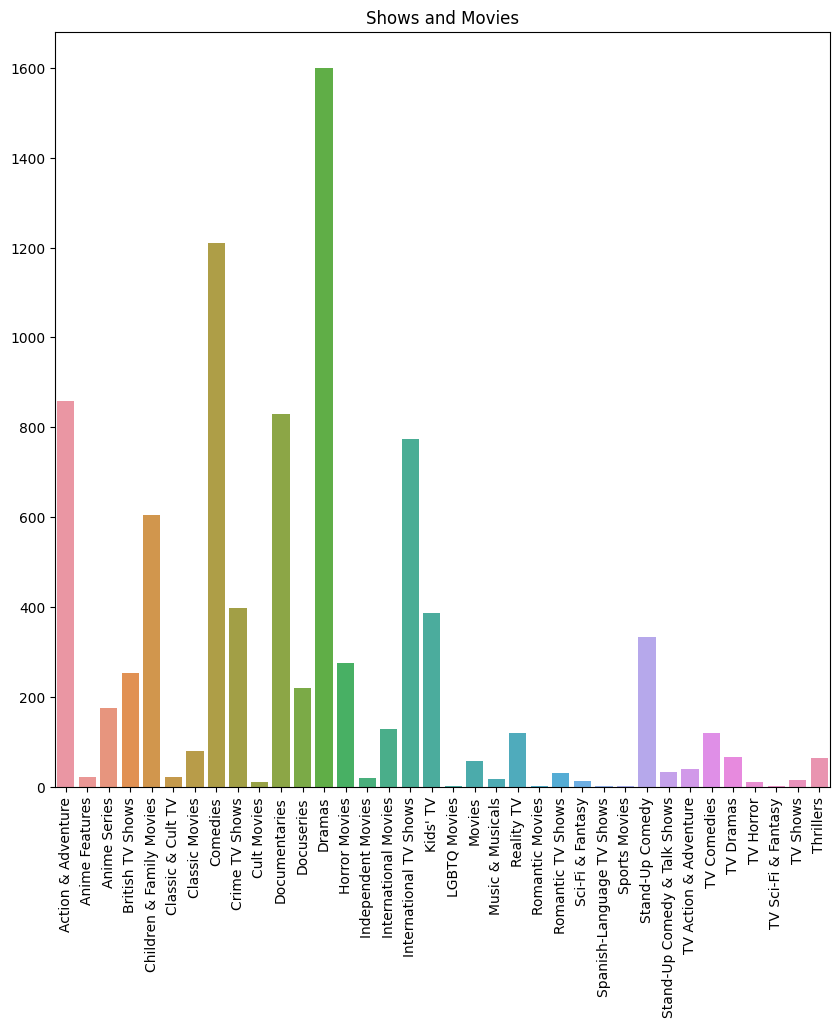

In [48]:
label, freq = np.unique(df.genres, return_counts=True)
plt.figure(figsize=(10,10), dpi=100)
sns.barplot(x = label, y=freq).set_title('Shows and Movies')
plt.xticks(rotation=90)
plt.show()

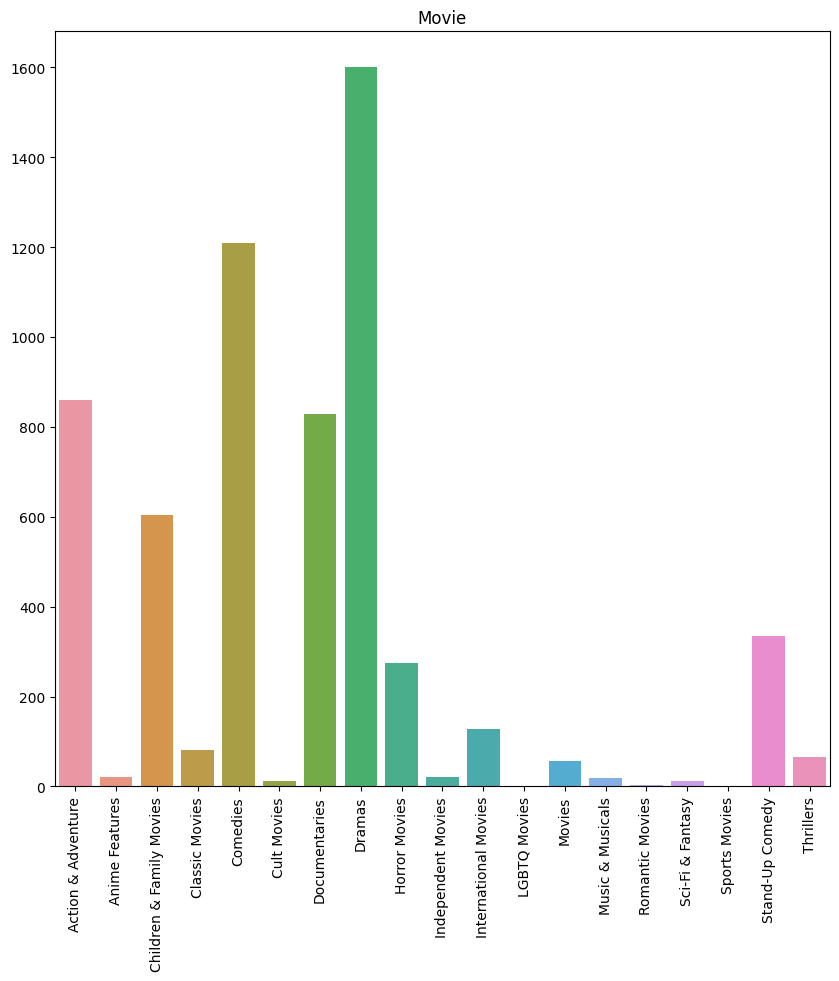

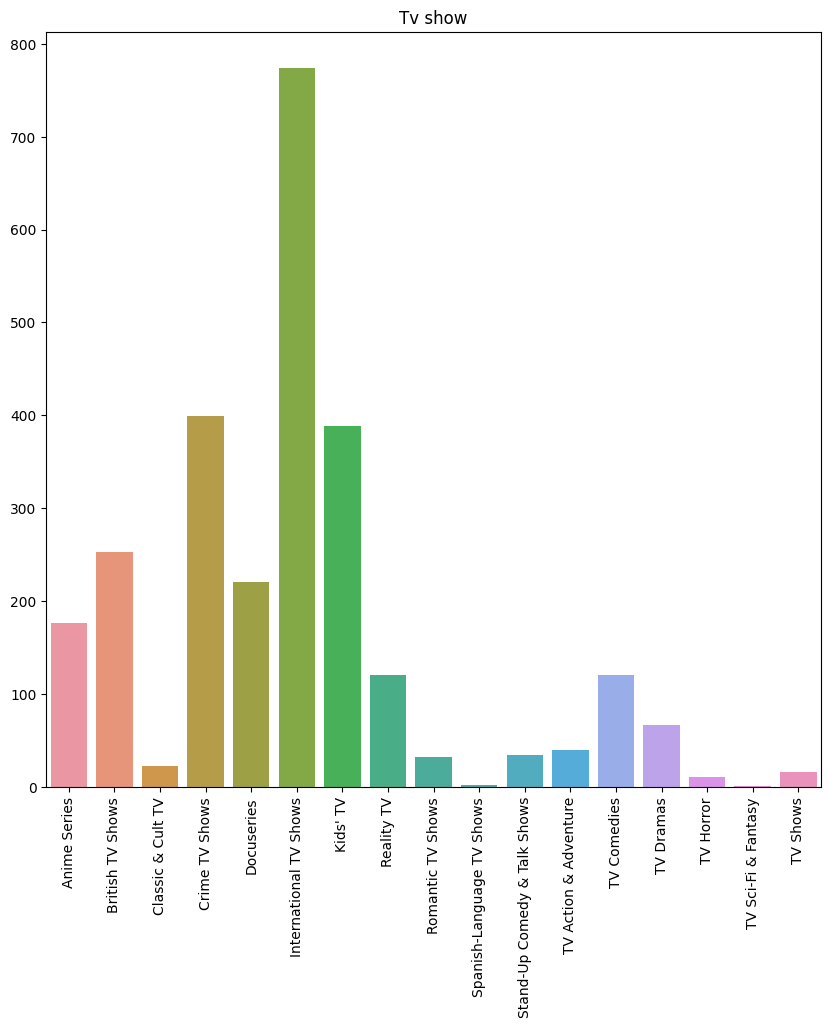

In [60]:
for typ in np.unique(df.type):
    filtered_data = df['genres'][df.type == typ]
    label, freq = np.unique(filtered_data, return_counts=True)
    plt.figure(figsize=(10,10), dpi=100)
    sns.barplot(x = label, y=freq).set_title(typ.capitalize())
    plt.xticks(rotation=90)

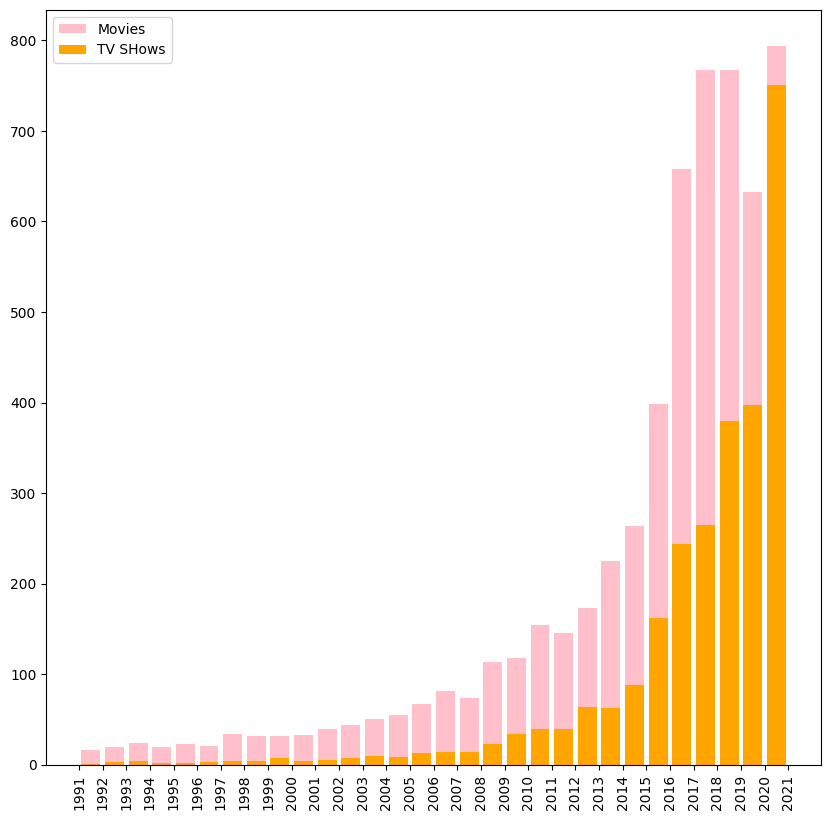

In [125]:
movies = df[(df['type'] == 'Movie') & (df['release_year'] > 1990)].release_year
tv_shows = df[(df['type'] == 'TV Show') & (df['release_year'] > 1990)].release_year
bins = np.unique(movies)
plt.figure(figsize=(10,10), dpi=100)
plt.hist(movies, bins, label='Movies', rwidth=0.8, color='pink')
plt.hist(tv_shows, bins,  label='TV SHows', rwidth=0.8, stacked=True, color='orange')
plt.legend(loc='upper left')
plt.xticks(bins, rotation=90)
plt.show()
# The masses prefered movies till date
# But shows are picking up pace too
# could be improved